64.	Создайте триггер, сохраняющий информацию о изменении зарплаты преподавателей и дату изменения.

In [ ]:
-- Создаем таблицу для логов
CREATE TABLE IF NOT EXISTS salary_change_log (
    change_id SERIAL PRIMARY KEY,
    professor_id INTEGER,
    old_wage_rate NUMERIC(3,2),
    new_wage_rate NUMERIC(3,2),
    change_date TIMESTAMP DEFAULT CURRENT_TIMESTAMP
);

CREATE OR REPLACE FUNCTION log_salary_change()
RETURNS TRIGGER AS $$
BEGIN
    IF NEW.wage_rate IS DISTINCT FROM OLD.wage_rate THEN
        INSERT INTO salary_change_log (professor_id, old_wage_rate, new_wage_rate)
        VALUES (NEW.professor_id, OLD.wage_rate, NEW.wage_rate);
    END IF;
    RETURN NEW;
END;
$$ LANGUAGE plpgsql;

CREATE OR REPLACE TRIGGER trg_log_salary_change
AFTER UPDATE OF wage_rate ON public.employments
FOR EACH ROW EXECUTE FUNCTION log_salary_change();

In [ ]:
UPDATE public.employments
SET wage_rate = 2.5
WHERE professor_id = 810001;

In [ ]:
SELECT * FROM salary_change_log;

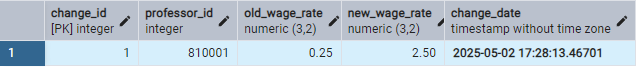